<a href="https://colab.research.google.com/github/dagomezb/ML-en-Salud/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Networks**

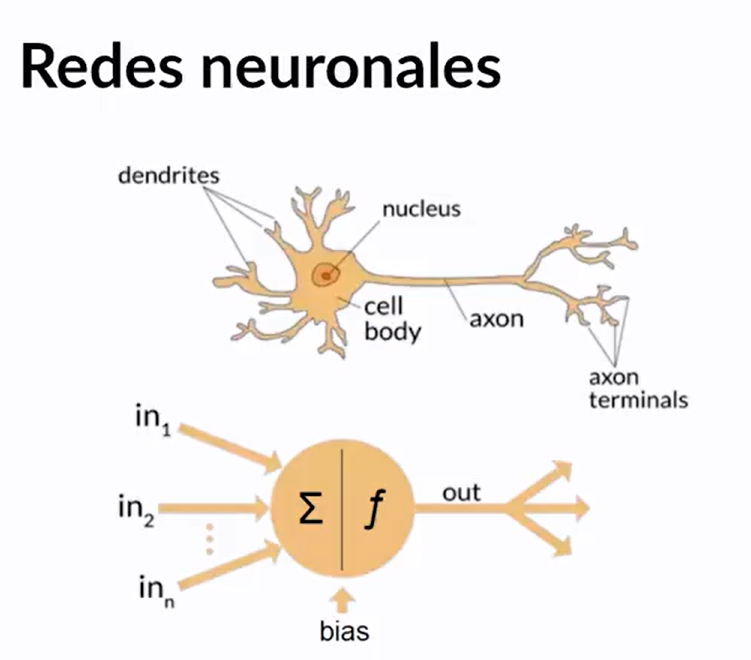




In [1]:
#Librerias necesarias
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
X, y = datasets.load_iris(return_X_y=True, as_frame=True)

In [3]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [6]:
# Let's get a train and test set. We'll use 20% of our database (30 flowers) as a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [7]:
# First, we initialize the model.
model = tf.keras.models.Sequential()

In [8]:
# First our input layer. For this layer, and this layer only, we need to specify the size of our input. For our dataset this means the amount of columns in our X.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(X.shape[1],)))
# Now some hidden layers
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
# Finally, our output layer. Since we have 3 possible classes, we need 3 output neurons. 
# For a regression problem, we would have only 1. For an image creation network, we would have as many pixels as the image we wanted to create!
model.add(tf.keras.layers.Dense(3))
# A final layer with several output neurons gives us logits as results. We can do a final pass with a Softmax layer to turn them into percentages.
model.add(tf.keras.layers.Softmax())

In [9]:
optim = tf.keras.optimizers.Adam(learning_rate=0.01)

In [12]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=optim,metrics=['accuracy'])

history = model.fit(X_train.values, y_train.values,
        validation_data=(X_test.values, y_test.values),
        epochs = 20,
        batch_size=32)

Epoch 1/20
4/4 [==============================] - 1s 54ms/step - loss: 0.1581 - accuracy: 0.9500 - val_loss: 0.1250 - val_accuracy: 0.9000
Epoch 2/20
4/4 [==============================] - 0s 11ms/step - loss: 0.1622 - accuracy: 0.9250 - val_loss: 0.1882 - val_accuracy: 0.8667
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 0.1514 - accuracy: 0.9500 - val_loss: 0.2036 - val_accuracy: 0.8333
Epoch 4/20
4/4 [==============================] - 0s 9ms/step - loss: 0.2008 - accuracy: 0.9083 - val_loss: 0.2161 - val_accuracy: 0.8667
Epoch 5/20
4/4 [==============================] - 0s 11ms/step - loss: 0.1367 - accuracy: 0.9333 - val_loss: 0.0831 - val_accuracy: 0.9667
Epoch 6/20
4/4 [==============================] - 0s 9ms/step - loss: 0.0986 - accuracy: 0.9667 - val_loss: 0.0638 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 9ms/step - loss: 0.0987 - accuracy: 0.9667 - val_loss: 0.1050 - val_accuracy: 0.9333
Epoch 8/20
4/4 [===============

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
 softmax (Softmax)           (None, 3)                 0         
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


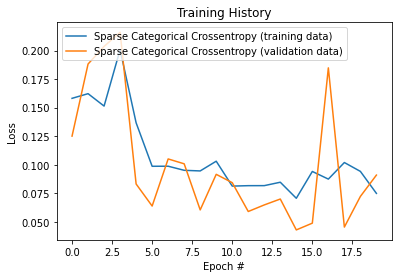

In [23]:
# Plot history
plt.plot(history.history['loss'], label='Sparse Categorical Crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Sparse Categorical Crossentropy (validation data)')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(loc="upper left")
plt.show()

In [14]:
# Let's get the prediction for the first flower in the test set
model.predict(X_test[:1])

array([[2.5999197e-04, 9.8641741e-01, 1.3322662e-02]], dtype=float32)

In [15]:
predictions = model.predict(X_test)
for idx, prediction in enumerate(predictions):
    print('We predict: '+str(np.argmax(prediction))+'. Real Species was: '+str(y_test.iloc[idx]))

We predict: 1. Real Species was: 1
We predict: 0. Real Species was: 0
We predict: 2. Real Species was: 2
We predict: 1. Real Species was: 1
We predict: 1. Real Species was: 1
We predict: 0. Real Species was: 0
We predict: 1. Real Species was: 1
We predict: 1. Real Species was: 2
We predict: 1. Real Species was: 1
We predict: 1. Real Species was: 1
We predict: 2. Real Species was: 2
We predict: 0. Real Species was: 0
We predict: 0. Real Species was: 0
We predict: 0. Real Species was: 0
We predict: 0. Real Species was: 0
We predict: 1. Real Species was: 1
We predict: 2. Real Species was: 2
We predict: 1. Real Species was: 1
We predict: 1. Real Species was: 1
We predict: 2. Real Species was: 2
We predict: 0. Real Species was: 0
We predict: 2. Real Species was: 2
We predict: 0. Real Species was: 0
We predict: 2. Real Species was: 2
We predict: 2. Real Species was: 2
We predict: 2. Real Species was: 2
We predict: 2. Real Species was: 2
We predict: 2. Real Species was: 2
We predict: 0. Real 

In [31]:
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(np.argmax(predictions, axis=1), y_test)
print(matriz)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
